## Predicting Employee Productivity

### Introduction

The garment industry is one of the key examples of the industrial globalization of the modern era.

It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.

### Project goal

For this project, we would be using the modified version of the [Productivity Prediction of Garment Employees Dataset](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) to predict the employee productivity of a garment factory using decision trees. Below is the data dictionary:

- date:	Date in MM-DD-YYYY
- day: Day of the Week
- quarter:	A portion of the month. A month was divided into four quarters
- department:	Associated department with the instance
- team:	Associated team number with the instance
- no_of_workers:	Number of workers in each team
- no_of_style_change:	Number of changes in the style of a particular product
-  targeted_productivity:	Targeted productivity set by the Authority for each team for each day.
- smv:	Standard Minute Value, it is the allocated time for a task
- wip:	Work in progress. Includes the number of unfinished items for products
- over_time:	Represents the amount of overtime by each team in minutes
- incentive:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time:	The amount of time when the production was interrupted due to several reasons
- idle_men:	The number of workers who were idle due to production interruption
- actual_productivity:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.


### Load the Dataset

In [1]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the dataset
garment = pd.read_csv('garments_worker_productivity.csv')
garment.tail(7)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246
1191,3/11/2015,Quarter2,sweing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57.0,0.650596
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.90,NaN,720,0,0.0,0,0,6.0,0.394722


### Explore the Dataset

Now that we have loaded in the dataset, lets make  some exploratory analysis to get insights on the data.  

In [3]:
#check the shape of the dataset
print('The  dataset has {} rows and {} columns.'.format(garment.shape[0] ,garment.shape[1]))

#print  the daaset info
garment.info()

The  dataset has 1197 rows and 15 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_produc

In [4]:
garment.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Next we'll explore the categorical features, but we'll rely on creating visualisations to understand how the data is distributed.

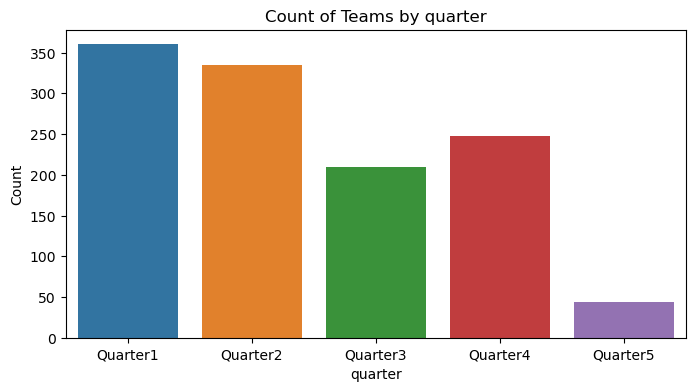

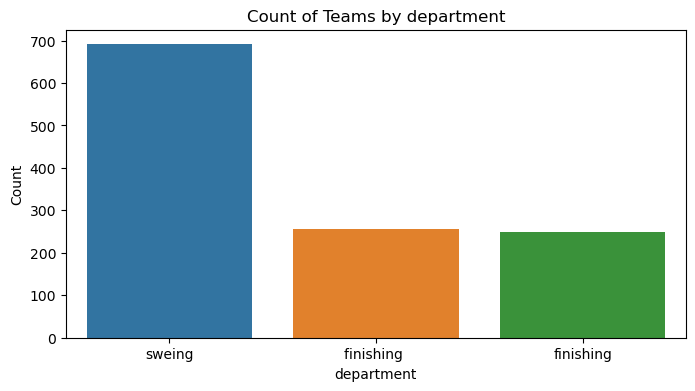

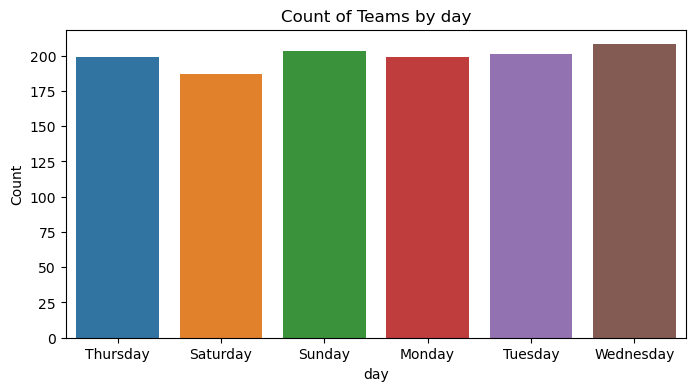

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


In [5]:
#plot a bar chart for the categorical columns
categorical_columns = ['quarter','department','day']

for col in categorical_columns:
    plt.figure(figsize = (8,4))
    sns.countplot(data = garment, x= col)
    plt.title(f'Count of Teams by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
#display the value counts for each categorical column
for col in categorical_columns:
    print(garment[col].value_counts())

Next, we examine the wip column that has empty values to understand how to go forward on our analysis.This column records the number of unfinished items for products.

In [6]:
#print the null values in the wip column
garment[garment["wip"].notnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


### Observations

From our analysis, we can see that the dataset has 1197 columns and 27 row. The 'wip' column contains missing values. Replacing the missing values with the mean is an option. From the data column, we can see a range of 2-89 workers in each team.

The 'Date' column has a wrong datatype, it shoud be changed to datetime type. The  quarter column has 4 unique values. We also have case of misspelled entries in the department column, we will fix that during our data cleaning.

Next, we will be comparing the targeted_productivity and the actual_productivity column.

prod_rate
Above Expectation    869
Below Expectation    328
Name: count, dtype: int64


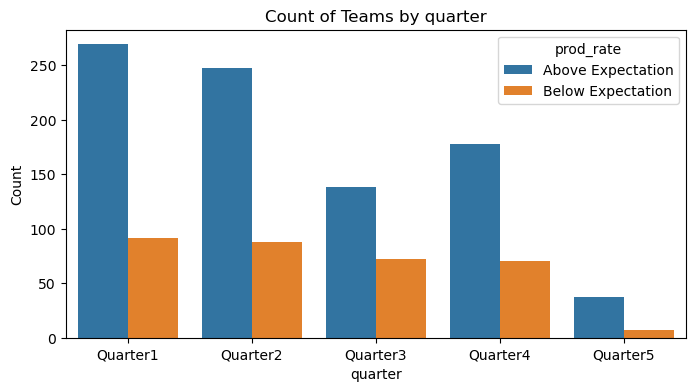

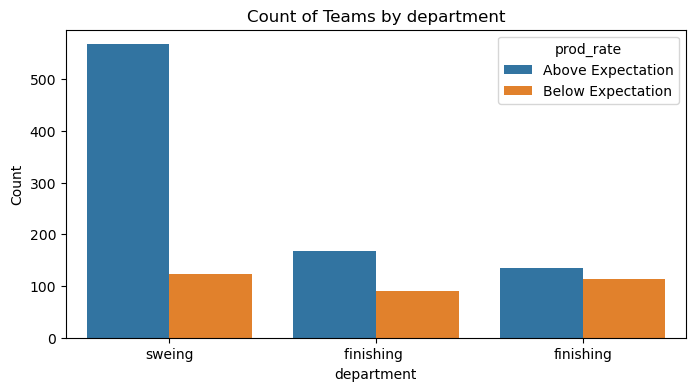

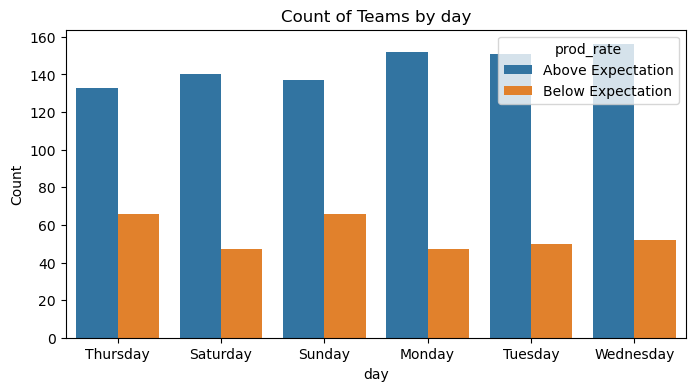

In [7]:
#compare the targeted_productivity and actual_productivity column
garment['prod_rate'] = np.where((garment['targeted_productivity'] < garment['actual_productivity']), 'Above Expectation', 'Below Expectation')
print(garment['prod_rate'].value_counts())


#plot a bar chart for categorical columns grouped by prod_rate
for col in categorical_columns:
    plt.figure(figsize = (8,4))
    sns.countplot(data = garment, x= col, hue = 'prod_rate')
    plt.title(f'Count of Teams by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [8]:
#change the data type for the prod_rate column
garment["prod_rate"] = garment["prod_rate"].astype("object")
garment[["prod_rate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prod_rate  1197 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


 From the comparison of the targeted_productivity and the actual_productivity column, we can see that two-third of the teams performed above expecattions (their actual productivity is higher than the target productivity).

The sewing department has most of their teams performing above epectations. The number of teams working seems to reduce towards the end of the month. 

### Data Cleaning

We will cleaning the department column. The spelling of the entries for sewing is incorrect and the finishing department occours twice. 

In [9]:
garment['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [10]:
#replace sweing with sewing
garment['department'] = garment[['department']].replace('sweing','sewing')

#concateate the finishings
garment.loc[garment["department"] == "finishing ", "department"] = "finishing"
garment["department"].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

Since "quarter5" only features 44 observations and covers two days (January 29th and 31st), it may be a bit unnecessary to generate a whole column for such a small amount of observations. We would be adding it to "quarter4". We will aso replace the entries with intergers.

In [11]:
# add observatons for quarter 5 to quarter 4
garment.loc[garment["quarter"] == "Quarter5", "quarter"] = "Quarter4"
garment["quarter"].value_counts()

#replace the avlues with intergers
garment.loc[garment["quarter"] == "Quarter1", "quarter"] = 1
garment.loc[garment["quarter"] == "Quarter2", "quarter"] = 2
garment.loc[garment["quarter"] == "Quarter3", "quarter"] = 3
garment.loc[garment["quarter"] == "Quarter4", "quarter"] = 4
garment["quarter"].value_counts()

quarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64

In [12]:
#change the data type for the quarter column
garment["quarter"] = garment["quarter"].astype("int64")
garment[["quarter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


The 'number_of _workers' column has a float datatype. Since we cant have a fraction number of persons, we wil covert it to int datatype

In [13]:
garment['no_of_workers'] = garment['no_of_workers'].astype(int)
print(garment['no_of_workers'].dtype)

int32


The actual productivity column should have the same decimal preciion as the targeted productivity column.

In [14]:
garment['actual_productivity']= garment['actual_productivity'].round(2)

garment['actual_productivity'].head()

0    0.94
1    0.89
2    0.80
3    0.80
4    0.80
Name: actual_productivity, dtype: float64

From the information gotten from our analysis above, we would go ahead and delete some columns that does not provide enoough insights in the dataset. 
- date: Since the date doesnt run for a whole year, it only runs from january to marh, it does not provide us with much insights to understand the trends.  
- wip: It has too many empty observations, and we can't tell if an empty cell is equal to zero unfinished products or if it's simply missing information. Due to this uncertainty, the column should be removed.
- idle_time: There are only 18 observations with non-zero values and they barely add any information.
- idle_men: Much like the idle_time column, they barely add any information.
- no_of_style_change: We will remove the "no_of_style_change" column, due to only 147 observations where there are changes. and they were only one or two style changes.

The target column for our tree model is the 'prod_rate' column

In [15]:
garment = garment.drop(['date','wip',"idle_time", "idle_men",'no_of_style_change'], axis = 1)
garment.head(1)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,prod_rate
0,1,sewing,Thursday,8,0.8,26.16,7080,98,59,0.94,Above Expectation


In [16]:
garment.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'prod_rate'],
      dtype='object')

In [17]:
#rearrange the columns for easy readabil
garment = garment[["quarter", "day", "department", "team", "no_of_workers", "over_time", "smv", "incentive", "targeted_productivity", 
        "actual_productivity", "prod_rate"]]

garment.head(5)                 

,quarter,day,department,team,no_of_workers,over_time,smv,incentive,targeted_productivity,actual_productivity,prod_rate
0,1,Thursday,sewing,8,59,7080,26.16,98,0.80,0.94,Above Expectation
1,1,Thursday,finishing,1,8,960,3.94,0,0.75,0.89,Above Expectation
2,1,Thursday,sewing,11,30,3660,11.41,50,0.80,0.80,Above Expectation
3,1,Thursday,sewing,12,30,3660,11.41,50,0.80,0.80,Above Expectation
4,1,Thursday,sewing,6,56,1920,25.90,50,0.80,0.80,Above Expectation


### Data Cleaning (II)

We need to convert some columns from categorical to numerical in order to use them use them in our model.
The first column to be modified is the department column, we will replace it with '1' for the finishing entries and '0' for the sewing entries. We will also go ahead to rename the column to 'finish_dept'.

In [18]:
#replace the entries in the department column
garment['department'].replace({"sewing": 0, "finishing": 1}, inplace=True)

#change the datatype
garment['department'] = garment['department'].astype(int)

#rename the columns
garment.rename(columns = {'department':'finish_dept'}, inplace = True)

garment['finish_dept'].head(5)

0    0
1    1
2    0
3    0
4    0
Name: finish_dept, dtype: int32

For the categorical column, we will be using dummies (one-hot encoding) so as to make it easy for our model to interpret. Our code will create dummies, drop the original column and assign prefix for us easy identification of the dummies. Scikit learn makes it very easy for us to perform these actions within few lines of code. The columns we would be transforming include 'quarter','day' and 'team'.

In [19]:
#create dummies using make_column_transformer tool
col_trans = make_column_transformer(
        (OneHotEncoder(), ["quarter",'day','team']), 
        remainder = "passthrough", 
        verbose_feature_names_out = False)

onehot_garment = col_trans.fit_transform(garment)

garment = pd.DataFrame(onehot_garment, 
            columns = col_trans.get_feature_names_out())
garment.head()

,quarter_1,quarter_2,quarter_3,quarter_4,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,...,team_11,team_12,finish_dept,no_of_workers,over_time,smv,incentive,targeted_productivity,actual_productivity,prod_rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,59,7080,26.16,98,0.8,0.94,Above Expectation
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,8,960,3.94,0,0.75,0.89,Above Expectation
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0,30,3660,11.41,50,0.8,0.8,Above Expectation
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0,30,3660,11.41,50,0.8,0.8,Above Expectation
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,56,1920,25.9,50,0.8,0.8,Above Expectation


Our data is all cleaned up, we can proceed to build our tree!

### Building the Tree


Now that our data is all cleaned up, we will dive right into building our classification model and making predictions.

In [20]:
#divide the dataset
X = garment.drop(["actual_productivity","prod_rate"], axis=1)
y = garment["prod_rate"]

# Split your dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = 52)
X_train.head(3)

,quarter_1,quarter_2,quarter_3,quarter_4,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,...,team_9,team_10,team_11,team_12,finish_dept,no_of_workers,over_time,smv,incentive,targeted_productivity
1081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,58,6960,27.48,40,0.7
680,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,34,4080,15.26,63,0.8
999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,57,6840,26.66,23,0.6


In [21]:
#create an instance of the tree
class_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 4,random_state = 24)

#fit the training data on the model
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=24)

In [22]:
#compare and make predictions
y_pred = class_tree.predict(X_test)

comparison = pd.DataFrame(data = {"y_test": y_test, "y_pred": y_pred})
comparison.sample(10, random_state = 7)

,y_test,y_pred
366,Below Expectation,Below Expectation
673,Below Expectation,Below Expectation
1073,Above Expectation,Above Expectation
350,Above Expectation,Above Expectation
382,Below Expectation,Above Expectation
645,Below Expectation,Above Expectation
310,Above Expectation,Above Expectation
439,Above Expectation,Above Expectation
783,Below Expectation,Above Expectation
612,Above Expectation,Above Expectation


In [23]:
#print the tree accuracy
print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.81


### Tree Visualisation and Evaluation

Now that the model is instantiated and fitted to the data, we can visualize the results. Additionally, we can confirm the reliability of those results by applying evaluation techniques on the tree.

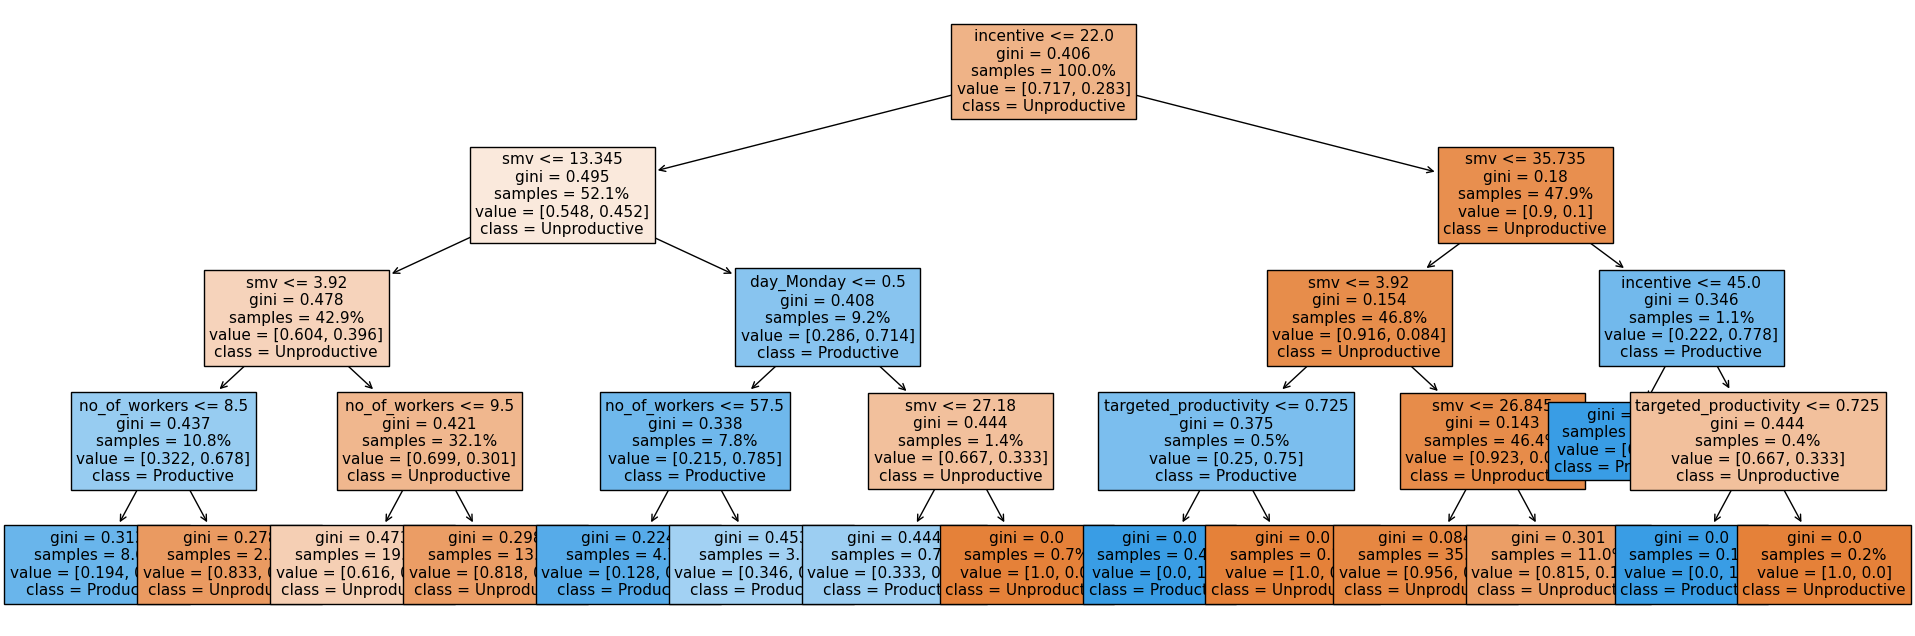

In [24]:
#visualize the tree
plt.figure(figsize = [24.0,8.0])
_ = plot_tree(class_tree, feature_names=X.columns.tolist(),
              class_names = ["Unproductive", "Productive"], filled = True, rounded = False, proportion = True, fontsize = 11) 

The most important columns, as we can see, ended up being "incentive", "no_of_workers" and "smv" ( the amount of time allotted for a task). These columns were utilized in almost all splits to gradually separate the dataset into increasingly homogeneous subsets. If we had increased the maximum depth, we would most likely be seeing more of other column spliting the dataset.

Now that we have visualised the tree, let's evaluate the tree using some of our metrics:
- confusion metrics
- Classsification report

In [25]:
#instantiate the confusion metrics
print(confusion_matrix(y_test, y_pred, labels = ["Above Expectation", "Below Expectation"]))

[[253  16]
 [ 51  40]]


In [26]:
print(classification_report(y_test, 
                            y_pred))

                   precision    recall  f1-score   support

Above Expectation       0.83      0.94      0.88       269
Below Expectation       0.71      0.44      0.54        91

         accuracy                           0.81       360
        macro avg       0.77      0.69      0.71       360
     weighted avg       0.80      0.81      0.80       360



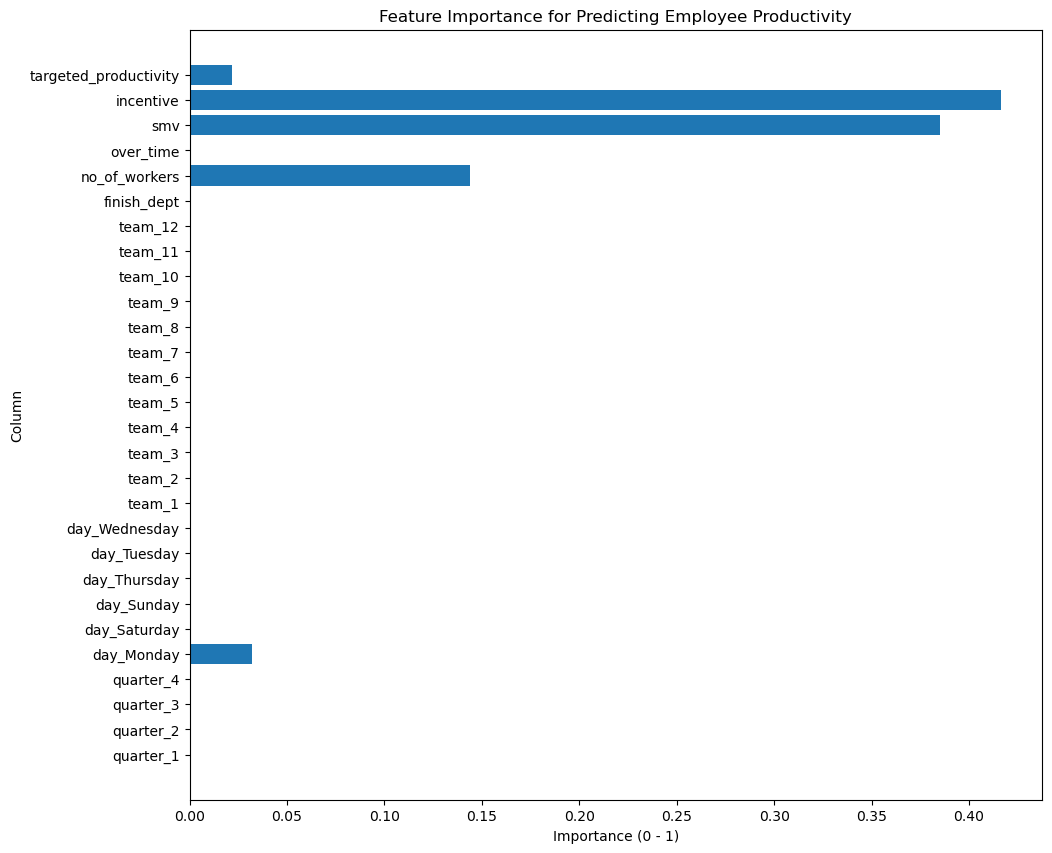

In [27]:
#check the feature importance
plt.rcParams["figure.figsize"] = [11.0, 10.0]

plt.barh(class_tree.feature_names_in_,
         class_tree.feature_importances_)

plt.xlabel("Importance (0 - 1)")
plt.ylabel("Column")
plt.title("Feature Importance for Predicting Employee Productivity")
plt.show()

From the above classification report, we can see that the model performed poorly in predicting the 'Below Expectation' class. This coulld be as a result of inbalacne in our training set. Also from the confusion matrix, we see that we have 251 True Negatives (observations where the class is correctly not predicted; in other words, the class doesn't appear in either y_test or y_pred) and 40 True Positives (observations where the class is correctly predicted; in other words, the class appears in both y_test and y_pred)

When we printed the feature importance attribute, we can see that the only columns that have much predictive power are the 'targeted_productivity', 'incentive','smv','no_of_workers' and 'day_monday'. We can decide to optimse our tree by dropping the columns that dont contibute to any threshold.

We can also use the cross validation tool to further evaluate and optimse our model. This tool allows us to use alternate test subsets to mitigate the risk of adapting the trees in excess to the random test subset that train_test_split chose for us, which could lead to exceptionally good metrics on that subset but fail to generalize to other test subsets.

In [28]:
# instantiate the cross validate tool
multiple_cross_scores = cross_validate(
                             class_tree, 
                             X, y, cv = 10, scoring= ("accuracy","recall_macro") )

print(multiple_cross_scores)


{'fit_time': array([0.04188371, 0.02438092, 0.03124189, 0.04314089, 0.03124619,
       0.01561999, 0.03125334, 0.03123832, 0.0377655 , 0.03125143]), 'score_time': array([0.04253364, 0.02369928, 0.02713799, 0.01597476, 0.00951505,
       0.03124619, 0.02216363, 0.01563263, 0.01564026, 0.01562715]), 'test_accuracy': array([0.81666667, 0.83333333, 0.81666667, 0.8       , 0.81666667,
       0.8       , 0.76666667, 0.76470588, 0.83193277, 0.7394958 ]), 'test_recall_macro': array([0.69487983, 0.73458725, 0.71368861, 0.65517241, 0.69487983,
       0.72100313, 0.63218391, 0.68103448, 0.71713362, 0.63301621])}


In [29]:
print(multiple_cross_scores["test_accuracy"].mean())

0.7986134453781512


As we can see, after double checking with Cross Validate, we're still fairly good metrics. This is a good step in the right direction.

### Explaining the Tree

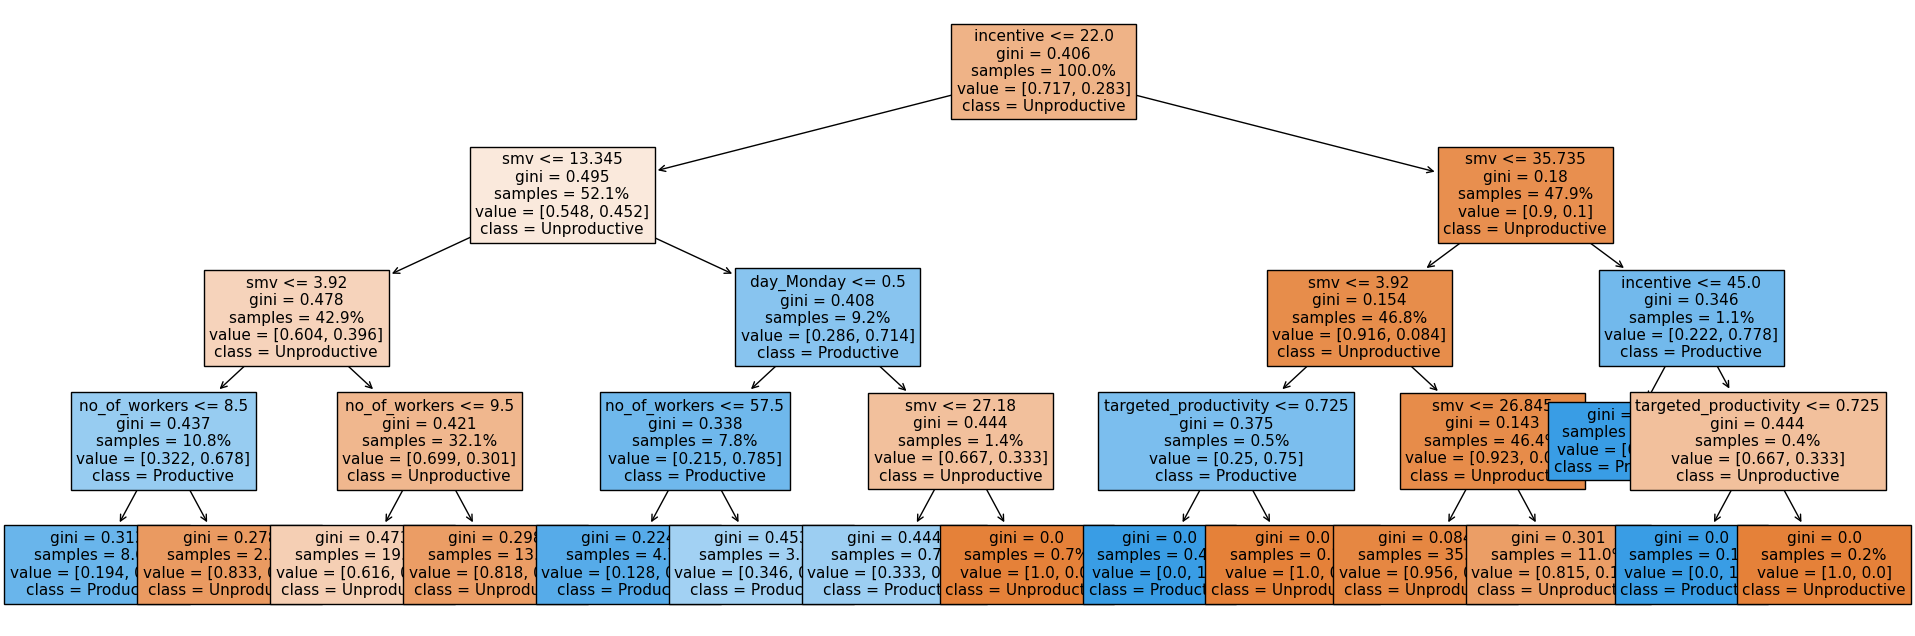

In [30]:
#visualize the tree
plt.figure(figsize = [24.0,8.0])
_ = plot_tree(class_tree, feature_names=X.columns.tolist(),
              class_names = ["Unproductive", "Productive"], filled = True, rounded = False, proportion = True, fontsize = 11) 

How can we be certain that these factors have the highest predictive power? We are aware of this thanks to the data displayed in the graphic's square boxes! 

The graphic above shows which factors greatly influence a team's productivity, with the "incentive", "smv" and "no of workers" variables being the most predictive. We can also see the 'day_Monday' and 'targeted_productivity' used to split a threshold. To understand better, the "incentive" variable shows how much money is offered as a reward for following a specific path of action. The amount of time allotted for a particular activity is represented by the "smv" (Standard Minute Value) variable and the 'no_of_workers' columns represents the number of workers in a team while the 'day_Monday' column represents if the day is monday.

These variables are found through the square boxes in the graphic, with the "number of workers" appearing at the top. The algorithm is called a Decision Tree, with the top box representing the most predictive feature and the bottom boxes providing predictions. The prediction is shown in the "class" component at the bottom of the box. To determine the path from the top box to the final ones, thresholds associated with every variable are used. Inputs are compared with these thresholds, starting from the root and reaching the leaves at the bottom. 

The Decision Tree can be used to predict outcomes for future or hypothetical scenarios, provided the required values are available.

### Using Random Forest

In [31]:
#instantiate the random tree
random_forest = RandomForestClassifier(max_depth = 3, n_jobs = -1, random_state = 49,n_estimators = 20, oob_score = True)
random_forest.fit(X_train, y_train)
random_forest_oob = random_forest.oob_score_
print(random_forest_oob)

0.7550776583034647


In [32]:
#print the accuracy
y_pred_ = random_forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_), 3))

Accuracy: 0.794


We may be assured of our outcomes because the Random Forest's evaluation metrics and Decision Tree scores are comparable!

It's best practice to double-check Trees with a Random Forest due to their propensity to overfit the data.

### Conclusion

Now that our project is complete, lets take our time to go through the steps we took for various aspects of our project.

- We loaded our dataset and performed some exploratory analysis. We also examined the columns and dropped the irrelevant ones. 
- Next, we cleaned the columns we choose as the feature columns and prepared the data for modelling. 
- The next step was to instantiate the Decision Tree model, evaluate the efficiency of the model and display the tree. The model had an acuracy of 0.79 which is good enough for the tree model. 
- Random Forest was employed to double check the trees' tendency to overfit data. We got an acuracy of 79% which implies that the model has little or  no overfitting tendencies. 